# LINEAR REGRESSION

### Problem statement
- To predict total sales by using features like money spent on marketing on individual items

In [1]:
# Importing basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# clear warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
### Import the dataset

data = pd.read_csv('Advertising.csv')
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


### Domain analysis

- **TV** - Amount spent on TV Advertisement in dollars.
- **Radio** - Amount spent on Radio Advertisement in dollars.
- **Newspaper** - Amount spent on Newspaper Advertisement in dollars.
- **Sales** - Amount spent on Sales Advertisement in dollars.

### Basic Checks

In [6]:
# display first 2 rows
data.head(2)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4


In [7]:
data.tail(2)

,Unnamed: 0,TV,Radio,Newspaper,Sales
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
data.shape

(200, 5)

In [10]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


#### Insights
- The average TV, Radio, Newspaper investment will be 147,23,30 whereas average sales will be 14.
- The minimum investment on TV, Radio, Newspaper will be 0.70,0,0.30 whereas min sales will be 1.60
- The maximum investment on TV, Radio, Newspaper will be 296.40,49.60,114 whereas max sales will be 27.
- The spread of data will be high on TV compared to others, means investment options are high.

In [11]:
data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

### EDA

#### Univariate

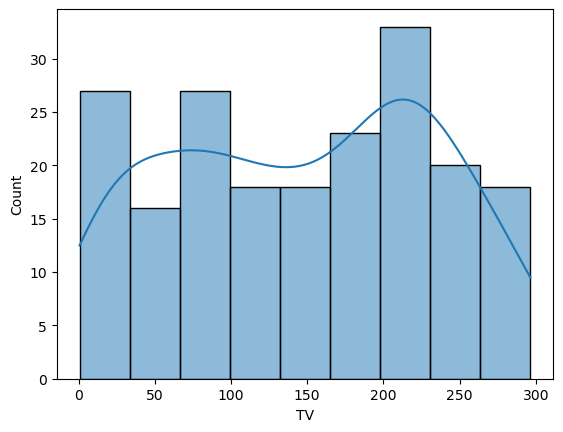

In [12]:
sns.histplot(data=data,x='TV',kde=True)   # kde-kernel density function
plt.show()

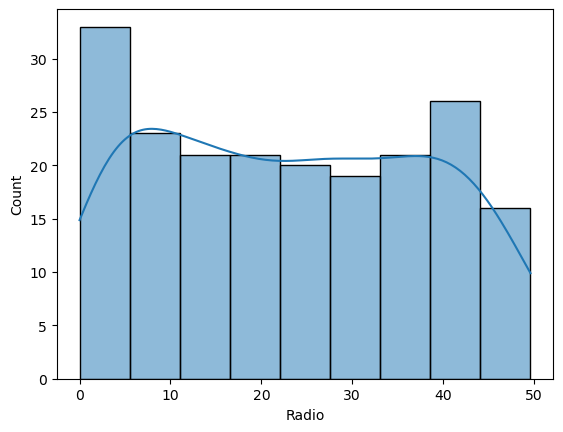

In [13]:
sns.histplot(data=data,x='Radio',kde=True)
plt.show()

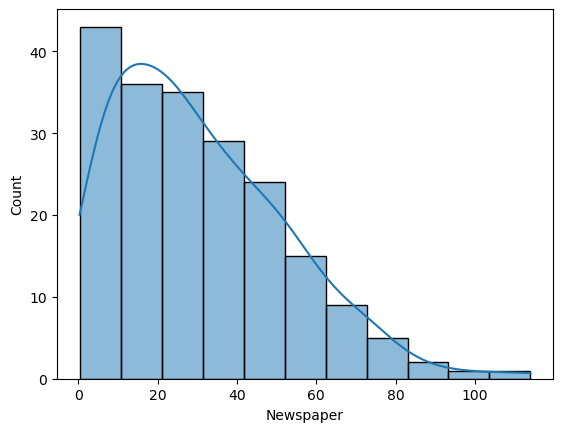

In [14]:
sns.histplot(data=data,x='Newspaper',kde=True)
plt.show()

<AxesSubplot:xlabel='Sales', ylabel='Count'>

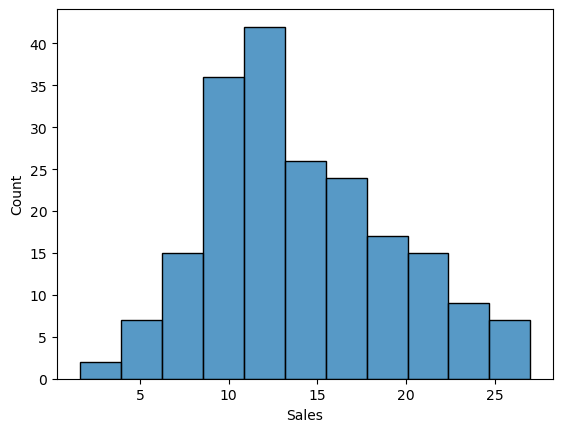

In [5]:
sns.histplot(x=data.Sales)

### Insights
- The range of investment for TV is from 0 to 296 (The investment is uniform)
- The  range of investment for Radio is from 0 to 49 (The investment is uniform)
- The range of investment for Newspaper is from 0 to 110 (The investment is not uniform)

#### Bivariate

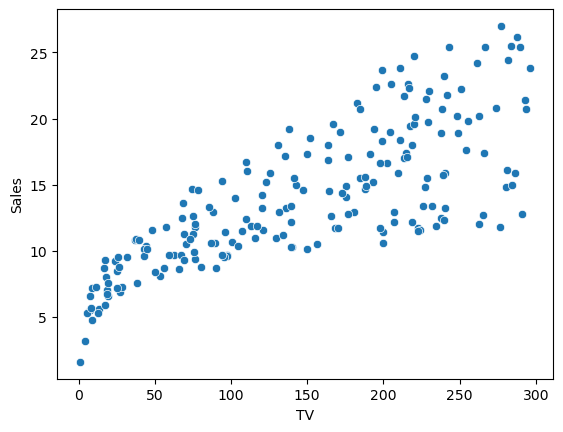

In [16]:
sns.scatterplot(data=data,x='TV',y='Sales')
plt.show()

### Insights
- There is a positive relationship between TV and Sales, so if investment on TV increases, then sales will also increase 

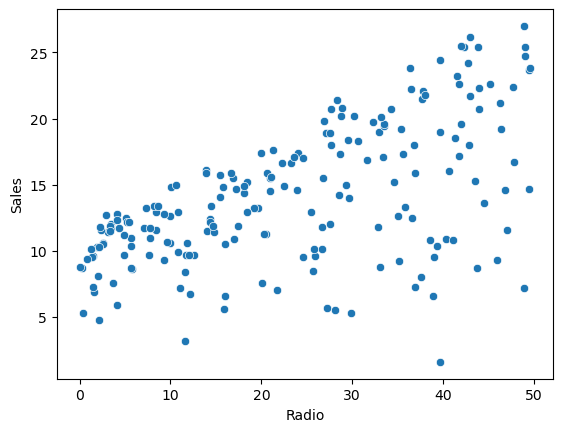

In [18]:
sns.scatterplot(data=data,x='Radio',y='Sales')
plt.show()

### Insights
- The increase in investment on Radio will increase the sales but not accurate as everytime.

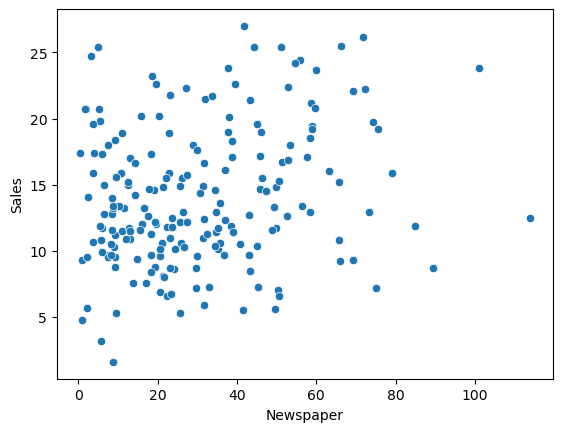

In [19]:
sns.scatterplot(data=data,x='Newspaper',y='Sales')
plt.show()

### Insights
- There is no relationship between Newspaper and Sales
- Hence investing more on newspaper is not a good practice in order to achieve good profits

#### Multivariate

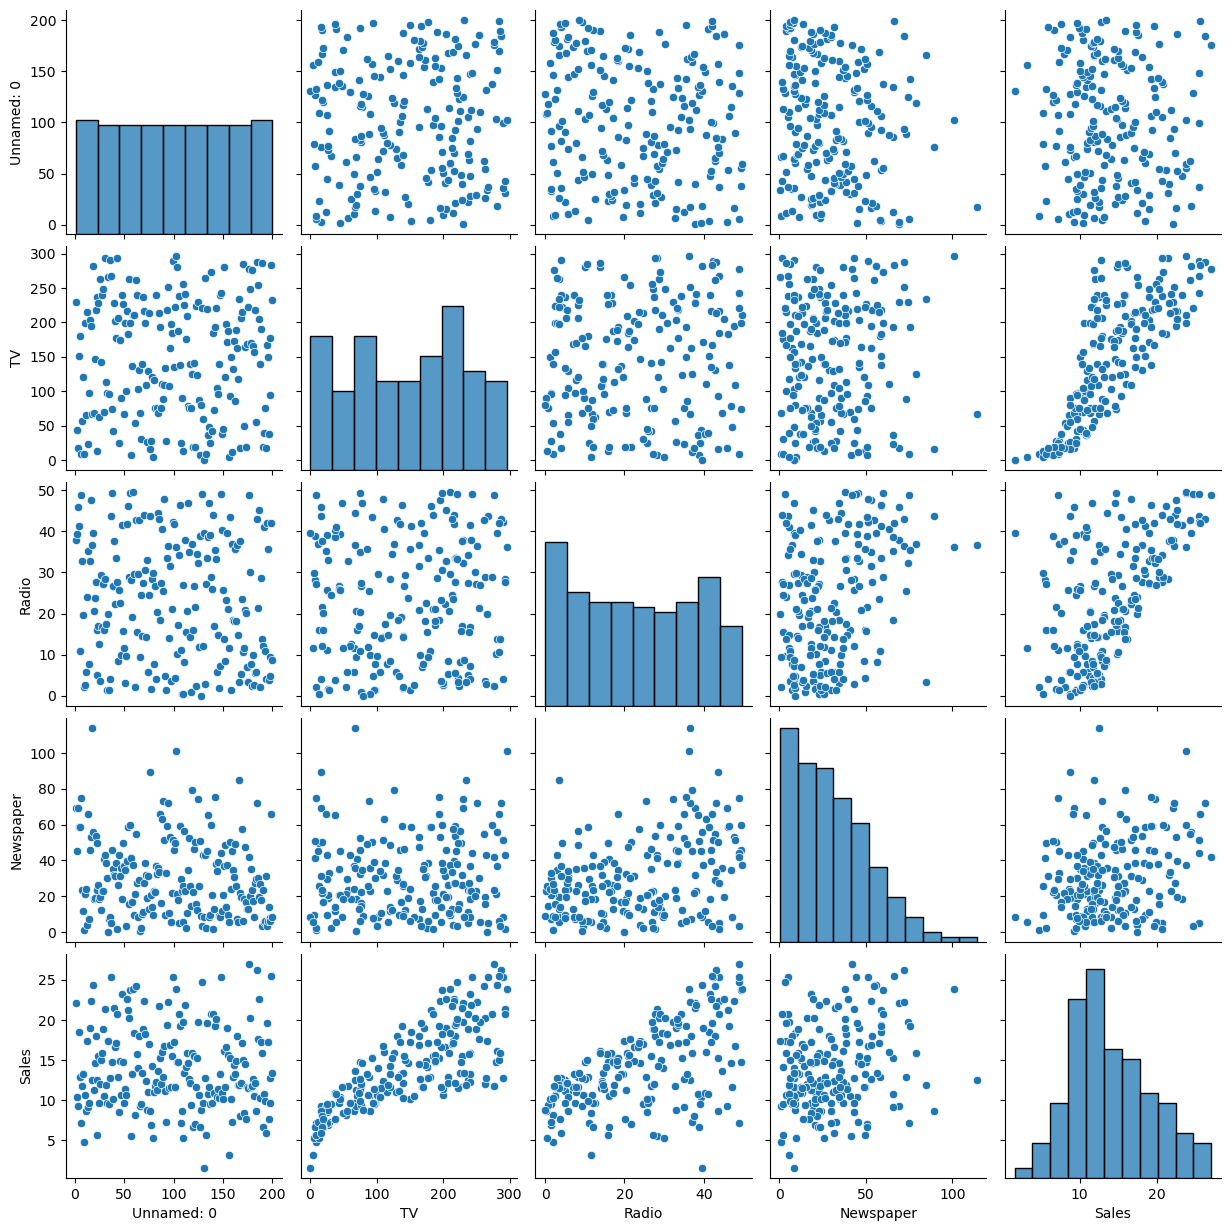

In [20]:
sns.pairplot(data=data)
plt.show()

### Data preprocessing

In [21]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [6]:
data.drop('Unnamed: 0',axis=1,inplace=True)
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [23]:
# scaling,balancing the data,outliers handling  (later)

In [6]:
# to check for the duplicates in the rows
data.duplicated().sum()

0

<AxesSubplot:xlabel='TV'>

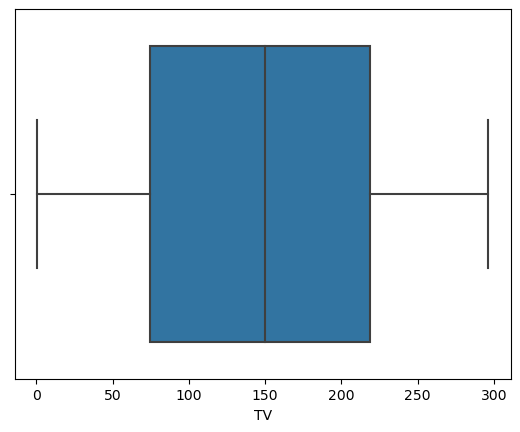

In [7]:
## to check for outliers plot boxplot for each columns
sns.boxplot(x=data.TV)

<AxesSubplot:xlabel='Newspaper'>

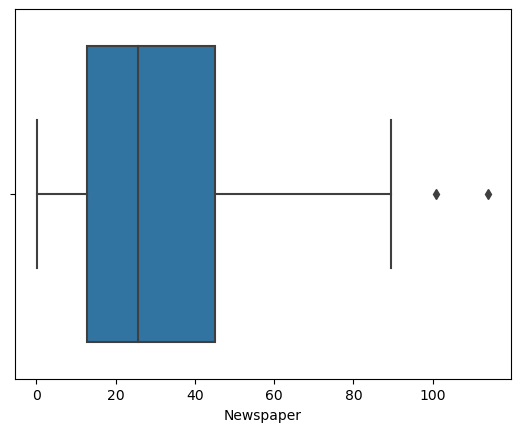

In [8]:
sns.boxplot(x=data.Newspaper)

<AxesSubplot:xlabel='Radio'>

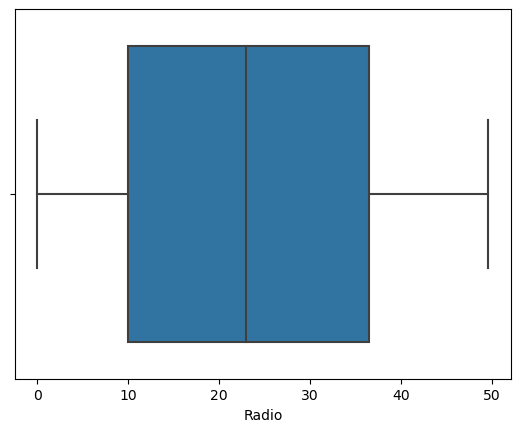

In [9]:
sns.boxplot(x=data.Radio)

<AxesSubplot:xlabel='Sales'>

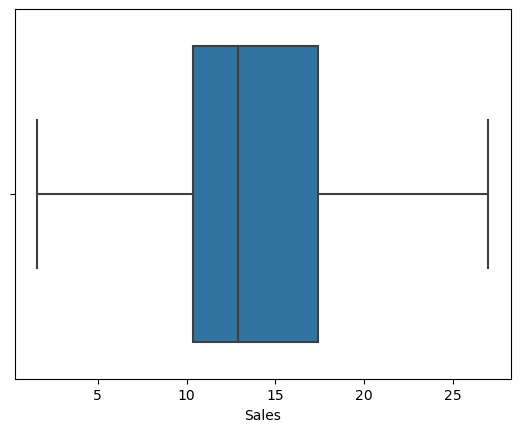

In [10]:
sns.boxplot(x=data.Sales)

In [ ]:
# since newspaper has outliers, we are going to handle it using IQR method
# IQR METHOD
# find Q1 and Q3
# find IQR=Q3-Q1
# find the lower limit and upper limit
# lower_limit= Q1-1.5*IQR
# upper_limit= Q3+1.5*IQR
# then find the values that are above upper limit and lesser than the lower limit

In [12]:
Q1 = data['Newspaper'].quantile(0.25)
Q1

12.75

In [13]:
Q3 = data['Newspaper'].quantile(0.75)
Q3

45.1

In [14]:
IQR = Q3-Q1
IQR

32.35

In [15]:
lower_limit = Q1-1.5*IQR
lower_limit

-35.775000000000006

In [16]:
upper_limit = Q3+1.5*IQR
upper_limit

93.625

In [17]:
# to find the values that are higher and lesser than the upper limit and the lower limit
data.loc[data['Newspaper']>upper_limit]

,Unnamed: 0,TV,Radio,Newspaper,Sales
16,17,67.8,36.6,114.0,12.5
101,102,296.4,36.3,100.9,23.8


In [18]:
data.loc[data['Newspaper']<lower_limit]

,Unnamed: 0,TV,Radio,Newspaper,Sales


In [19]:
# outliers should only be handled if it is less than 5%
# to check the percentage of the outliers present in the upperlimit,
len(data.loc[data['Newspaper']>upper_limit])/len(data)

0.01

In [20]:
# since we have less than 5%, we are going to handle those outliers with median (as it is not a normal distributed curve)
data.loc[data['Newspaper']>upper_limit,'Newspaper']=data['Newspaper'].median()

<AxesSubplot:xlabel='Newspaper'>

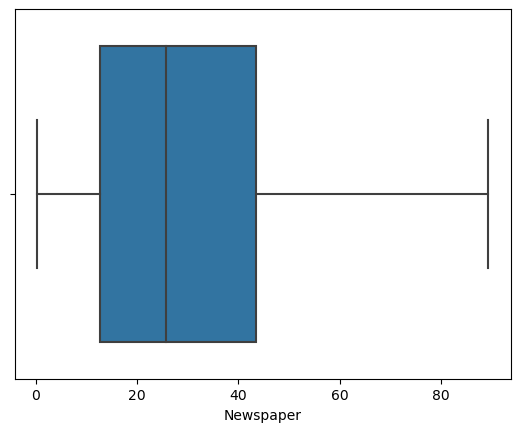

In [21]:
# now again plot the boxplot for newspaper to check if the outliers has been handled
sns.boxplot(data=data,x='Newspaper')

In [ ]:
# if you ever get a data that is normally distributed, use 3-sigma rule instead of IQR method to handle outliers

### Feature selection

In [24]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

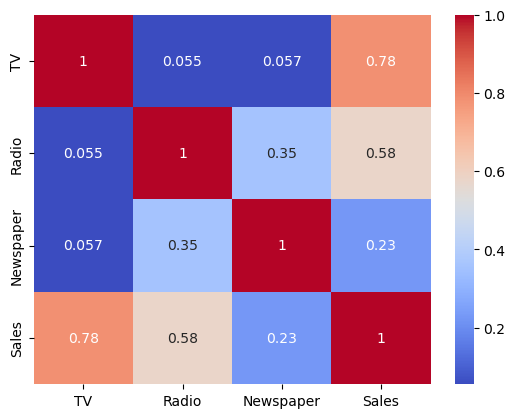

In [25]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
# 1.0 indicates high corr and the other end indicates low corr

<AxesSubplot:>

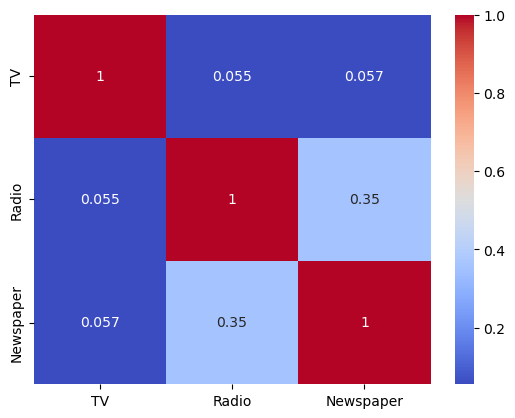

In [26]:
sns.heatmap(data.drop('Sales',axis=1).corr(),annot=True,cmap='coolwarm')      # to get correlation between independent columns

### Splitting the data

In [23]:
X = data.iloc[:,0:3]
Y = data.Sales

In [44]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [45]:
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [24]:
## Train test split
## we have used used 80% for training and 20% for testing as test_sixe is given as 0.20

from sklearn.model_selection import train_test_split # sklearn- scikit learn

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=42) # randomstate won't change the data again


In [25]:
x_train.shape

(160, 3)

In [26]:
x_test.shape

(40, 3)

In [27]:
# y_test are the actual values of x_test
y_test


95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: Sales, dtype: float64

### Model Implementation

In [36]:
# import Linear Regression model
from sklearn.linear_model import LinearRegression

# Initialize model
model = LinearRegression()

# Train model with x_train and y_train
model.fit(x_train,y_train)

LinearRegression()

In [37]:
## Testing 
## why are we giving x_test is because the straight line equation now has to predict the y values 

y_pred = model.predict(x_test)

In [38]:
y_pred

array([16.35671513, 20.82392043, 21.48955535, 10.62069465, 22.24296618,
       13.07146128, 21.08321051,  7.511511  , 13.65834782, 15.12241581,
        9.11213566,  6.6689664 , 14.1948765 ,  8.96246789,  9.70913121,
       12.16517998,  8.69275263, 16.33566874, 10.25840394, 18.87428465,
       19.46546464, 13.00000599, 12.44055726, 21.20819052,  7.86888202,
        5.78011947, 20.77151459, 12.00599526,  9.19035912,  8.608836  ,
       12.41113422,  9.99124272, 21.32518888, 12.10869029, 18.25701637,
       20.22601775, 14.17312844, 20.79984375, 11.10518058,  4.54921776])

In [50]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: Sales, dtype: float64

In [33]:
## To get slopes/coeff of the three input/independent variables (m1,m2,m3)
model.coef_

array([0.00050843, 0.04471938, 0.19083151])

In [34]:
## To get the intercept
model.intercept_

2.974955507993201

In [ ]:
# Hence the best fitted line for this data is
# Y=0.0005X1+0.044X2+0.190X3+2.974
# According to the straight line equation

In [43]:
## for example 
# what will be my total sales if my investment on TV is 100, Radio 50, Newspaper 20?
model.predict([[300,100,100]])

array([26.68257225])

### Model evaluation

In [51]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [52]:
# if r2 score is near to 1 then it's a good model
# range is between [-1,1]
r2_score(y_test,y_pred)


0.8994380241009121

In [53]:
mean_squared_error(y_test,y_pred)

3.1740973539761015

In [54]:
mean_absolute_error(y_test,y_pred)

1.4607567168117597

In [47]:
x_test.shape

(40, 3)

In [58]:
## Adjusted r2-score

adjusted_r2 = 1-(1-0.89)*(40-1)/(40-3-1)
adjusted_r2                                             # adjusted r2 score must always be lower than the actual r2 score

0.8808333333333334